# Data Science Bowl

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from visual import *
from plot3D import *

In [4]:
# Get the list of patients
patients = sorted(os.listdir('./input/sample_images/'))

Visualization inspired by Guido Zuidhof

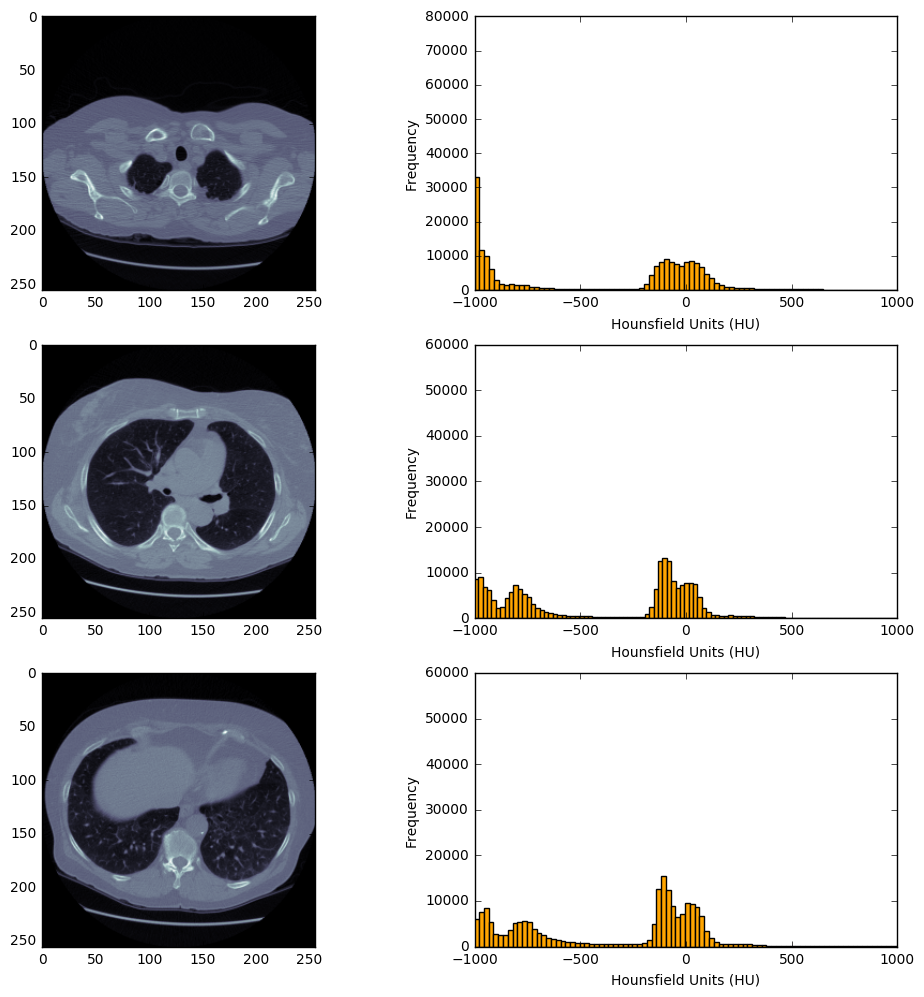

In [5]:
displayScan(patients[1],[10,50,90],plt.cm.bone)

In [ ]:
# 3D Visualization of the lungs thanks to a threshold function
plot3D(patients[0],threshold=500)

## Lung Extraction

What Guido realized is impressive. The one problem it didn't solve was, for me, hypodense and hyperdense nodes, that could be lost through the threshold function ... The main idea I based my following code is about geometrical considerations, to extract the lungs and only the lungs, without missing anything.

In [82]:
# Get slice i along the Z axis for patient p
img = getImages(patients[6])[70]

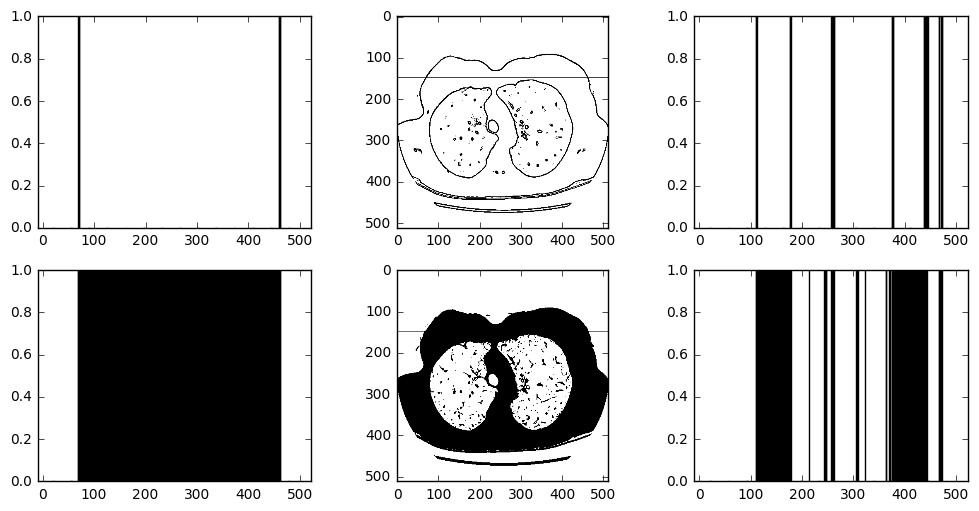

In [83]:
# Observe the different zones in the picture, after transforming it thanks to 
# the Sobol algorithm and the Laplacian filter (edges detection)
cutHist(img,150,200)

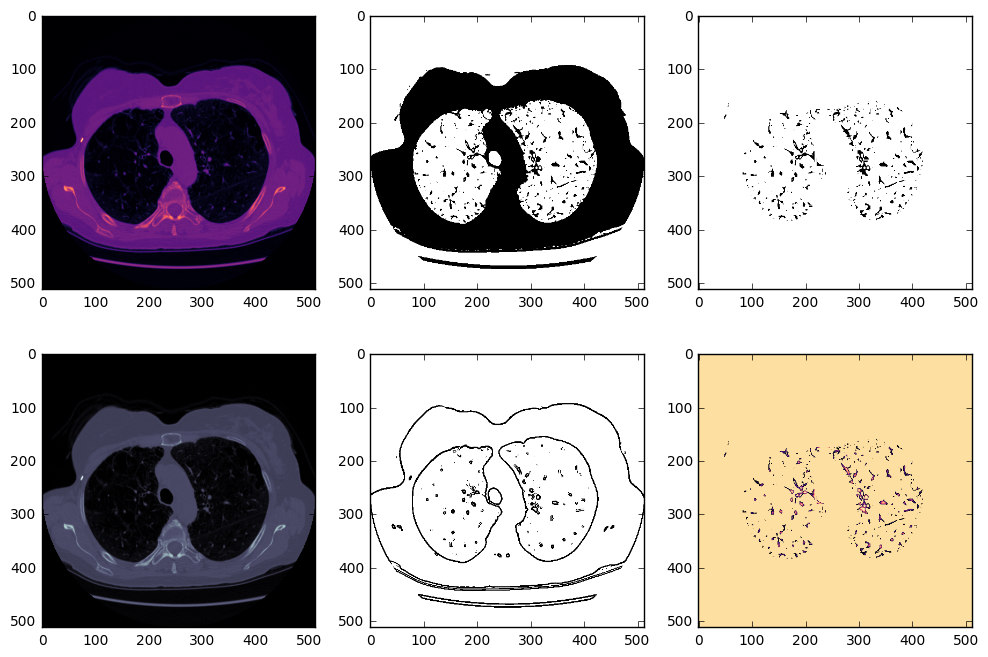

In [84]:
# Check if the extraction is meaningfull
observeExtraction(img)

|-> Problematic slice : 319


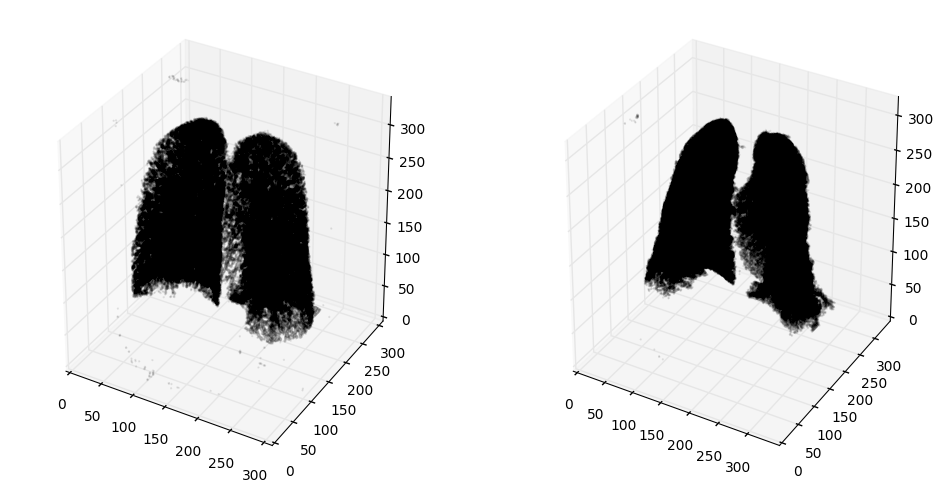

In [10]:
# Compare the extracted lungs of two patients
comparePatients3D(patients[0],patients[1])

## Algorithm Enhancement

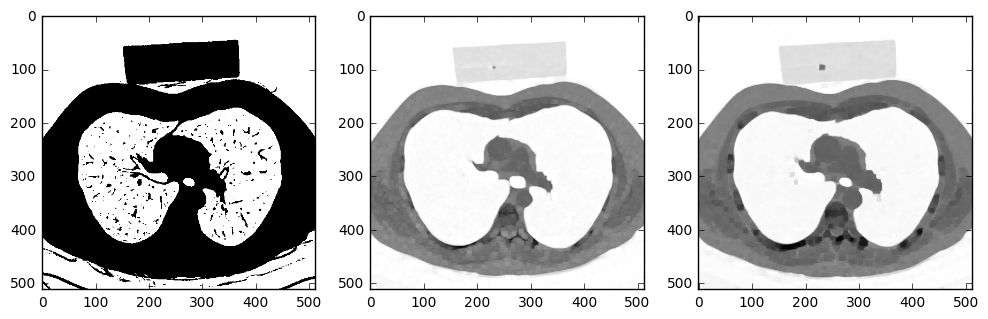

In [75]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.imshow(getLaplacianImage(img), cmap='Greys')
plt.subplot(1, 3, 2)
im0 = cv2.erode(img.astype('float64'), None, iterations=3)
plt.imshow(im0 ,cmap='Greys')
plt.subplot(1, 3, 3)
im1 = cv2.dilate(im0, None, iterations=3)
plt.imshow(im1, cmap='Greys')

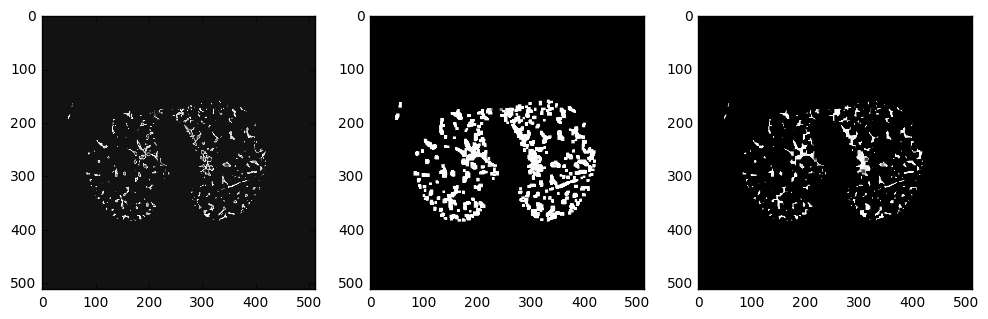

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
im2 = getRmMatrix(img)*img
plt.imshow(im2, cmap='Greys')
plt.subplot(1, 3, 2)
im2 = cv2.erode(im2.astype('float64'), None, iterations=2)
plt.imshow(im2, cmap='Greys')
plt.subplot(1, 3, 3)
im2 = cv2.dilate(im2, None, iterations=2)
plt.imshow(im2, cmap='Greys')

## Model Development